# Importar librerías

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Importar Datasheet

In [9]:
import pandas as pd
df = pd.read_csv("Data_Crime_Cleaning.csv")
df

,id_report,date_report,date_ocurrance,time_ocurrance,area_code,area_name,district,crime_severity,crime_code,crime_desc,...,latitude,longitude,area_valid,crime_ucr,month_report,year_report,year_month_report,month_ocurrance,year_ocurrance,year_month_ocurrance
0,190326475,2020-03-01,2020-03-01,21:30:00,7,hollywood,784,grave,510,vehicle - stolen,...,34.0375,-118.3506,True,property crime,3,2020,2020-03,3,2020,2020-03
1,200106753,2020-02-09,2020-02-08,18:00:00,1,77th street,182,grave,330,burglary from vehicle,...,34.0444,-118.2628,True,property crime,2,2020,2020-02,2,2020,2020-02
2,200320258,2020-11-11,2020-11-04,17:00:00,3,devonshire,356,grave,480,bike - stolen,...,34.0210,-118.3002,True,property crime,11,2020,2020-11,11,2020,2020-11
3,200907217,2023-05-10,2020-03-10,20:37:00,9,n hollywood,964,grave,343,shoplifting-grand theft ($950.01 & over),...,34.1576,-118.4387,True,property crime,5,2023,2023-05,3,2020,2020-03
4,220614831,2022-08-18,2020-08-17,12:00:00,6,hollenbeck,666,menos grave,354,theft of identity,...,34.0944,-118.3277,True,property crime,8,2022,2022-08,8,2020,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986410,242011172,2024-08-20,2024-08-17,23:00:00,2,central,2033,grave,341,"theft-grand ($950.01 & over)excpt,guns,fowl,li...",...,34.0617,-118.3066,True,property crime,8,2024,2024-08,8,2024,2024-08
986411,240710284,2024-07-24,2024-07-23,14:00:00,7,hollywood,788,grave,510,vehicle - stolen,...,34.0362,-118.3284,True,property crime,7,2024,2024-07,7,2024,2024-07
986412,240104953,2024-01-15,2024-01-15,01:00:00,1,77th street,101,menos grave,745,vandalism - misdeameanor ($399 or under),...,34.0685,-118.2460,True,property crime,1,2024,2024-01,1,2024,2024-01
986413,240309674,2024-04-24,2024-04-24,15:00:00,3,devonshire,358,grave,230,"assault with deadly weapon, aggravated assault",...,34.0215,-118.2868,True,violent crime,4,2024,2024-04,4,2024,2024-04


# Mostrar incidentes por fecha

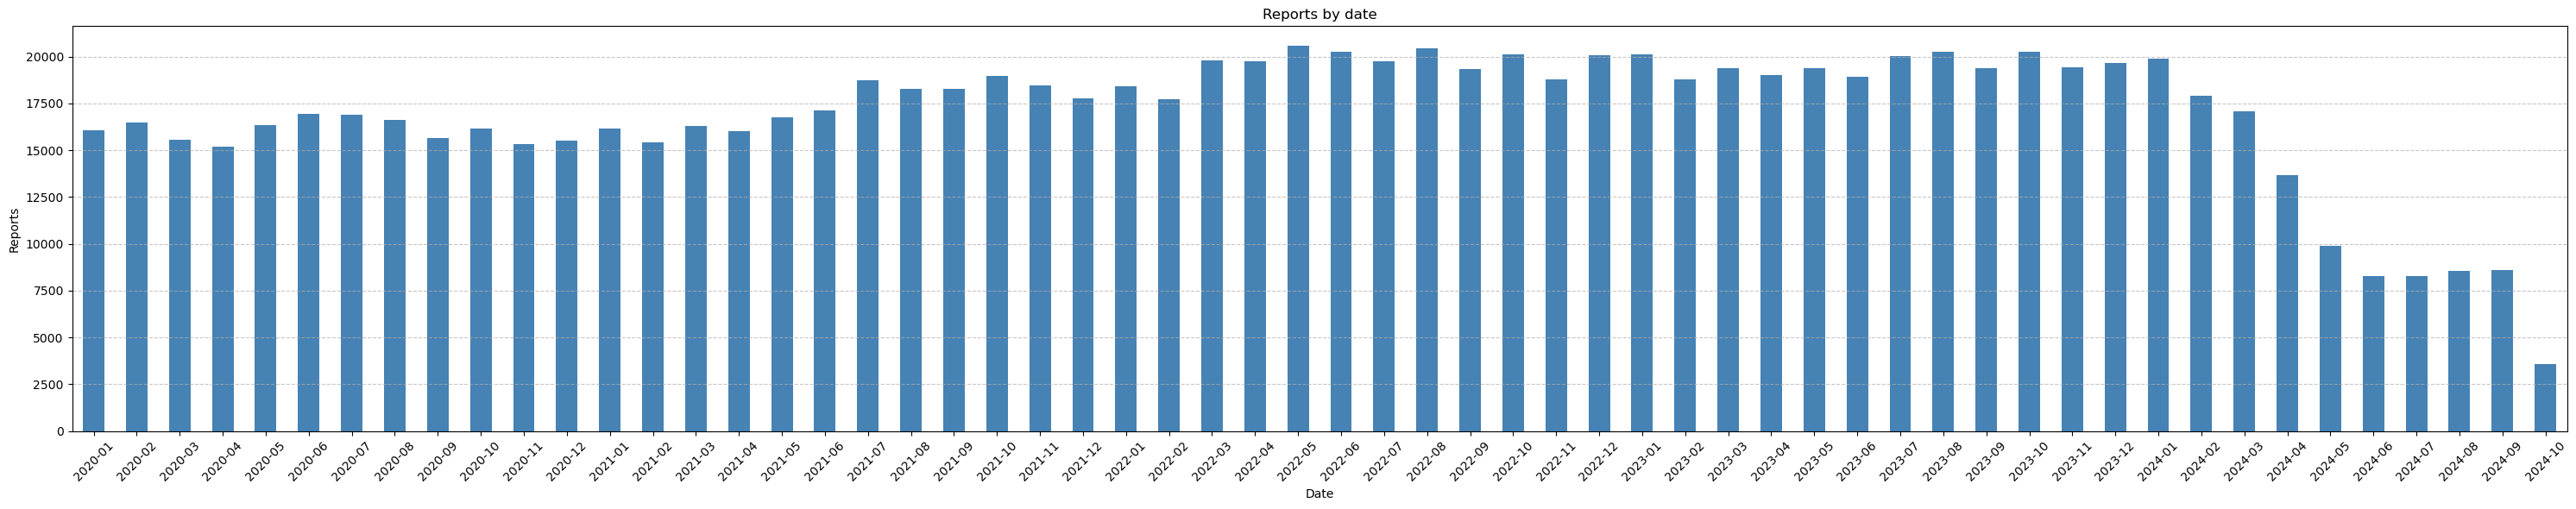

In [16]:
# Agrupar por 'year_month_report' y contar los 'id_report'
incidentes_por_mes = df.groupby('year_month_report')['id_report'].count()

# Crear gráfico de barras
plt.figure(figsize=(30, 6))
incidentes_por_mes.plot(kind='bar', color='steelblue')

plt.title('Reports by date')
plt.xlabel('Date')
plt.ylabel('Reports')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Obtener los 10 delitos más comunes

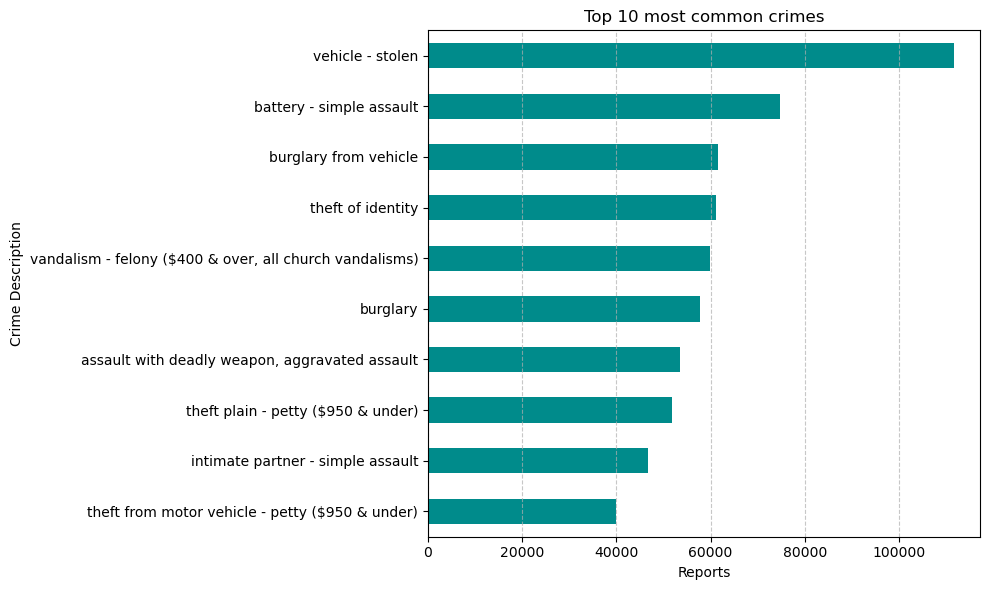

crime_desc
vehicle - stolen                                           111625
battery - simple assault                                    74707
burglary from vehicle                                       61631
theft of identity                                           61146
vandalism - felony ($400 & over, all church vandalisms)     59848
burglary                                                    57777
assault with deadly weapon, aggravated assault              53420
theft plain - petty ($950 & under)                          51762
intimate partner - simple assault                           46696
theft from motor vehicle - petty ($950 & under)             39865
Name: count, dtype: int64

In [23]:
delitos_comunes = df['crime_desc'].value_counts().head(10)

# Graficar
plt.figure(figsize=(10, 6))
delitos_comunes.plot(kind='barh', color='darkcyan')
plt.title('')
plt.xlabel('Reports')
plt.ylabel('Crime Description')
plt.gca().invert_yaxis()  # Para que el más frecuente aparezca arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
delitos_comunes

# Mostrar la gráfica conjunta de los 4 delitos más habituales

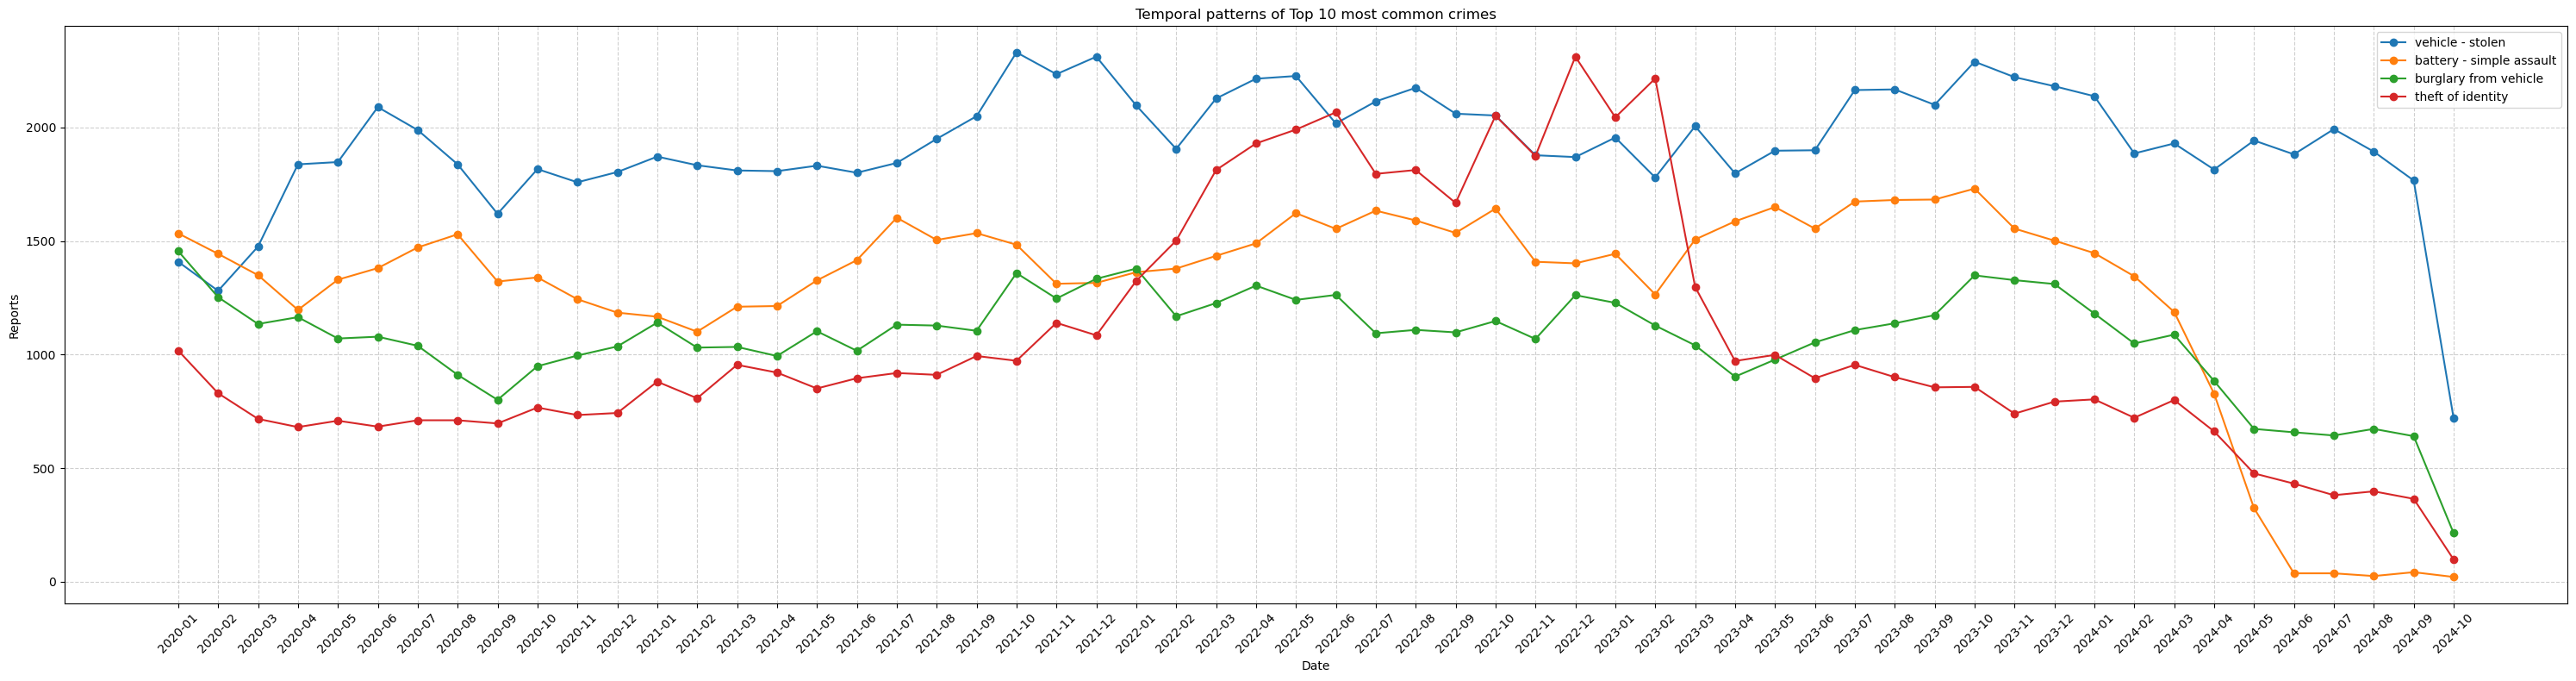

In [30]:
# Usamos los 4 delitos más frecuentes
delitos_comunes = df['crime_desc'].value_counts().head(4).index.tolist()

plt.figure(figsize=(30, 8))

# Colores distintos por delito
colores = matplotlib.colormaps['tab10'] # tab10 tiene hasta 10 colores distintos

# Iterar sobre cada delito y graficar su patrón temporal
for i, delito in enumerate(delitos_comunes):
    # Filtrar las filas que contienen el delito (sin usar regex para evitar problemas)
    df_filtrado = df[df['crime_desc'].str.contains(delito, case=False, na=False, regex=False)]
    
    # Agrupar por fecha y contar
    patron = df_filtrado.groupby('year_month_ocurrance')['id_report'].count().sort_index()
    
    # Añadir la línea al gráfico
    plt.plot(patron.index, patron.values, marker='o', label=delito, color=colores(i))

# Personalización del gráfico
plt.title('Temporal patterns of Top 10 most common crimes')
plt.xlabel('Date')
plt.ylabel('Reports')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Filtrar por delito vehicle - stolen

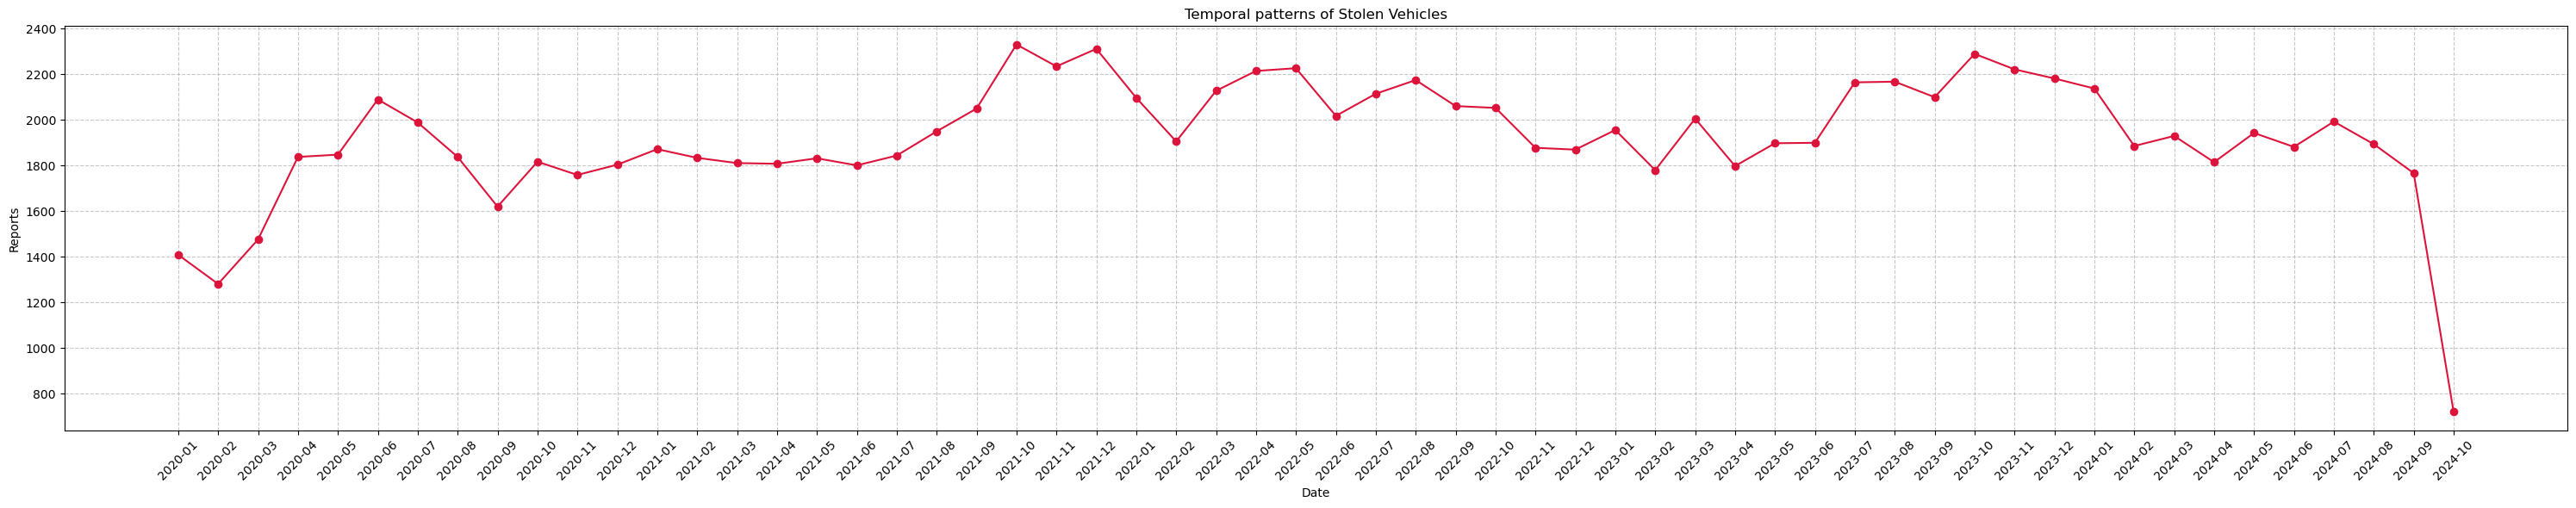

In [37]:
vehicle_stolen = 'vehicle - stolen'
df_filtrado = df[df['crime_desc'].str.contains(vehicle_stolen, case=False, na=False)]

# Agrupar por mes/año de ocurrencia y contar incidentes
patron_temporal_vehicle_stolen = df_filtrado.groupby('year_month_ocurrance')['id_report'].count().sort_index()

# Gráfico
plt.figure(figsize=(30, 6))
plt.plot(patron_temporal_vehicle_stolen.index, patron_temporal_vehicle_stolen.values, marker='o', color='crimson')

plt.title('Temporal patterns of Stolen Vehicles')
plt.xlabel('Date')
plt.ylabel('Reports')
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar todas las fechas en el eje X
plt.xticks(ticks=range(len(patron_temporal_vehicle_stolen.index)), labels=patron_temporal_vehicle_stolen.index, rotation=45)

plt.tight_layout()
plt.show()

# Filtrar por delito battery - simple assault

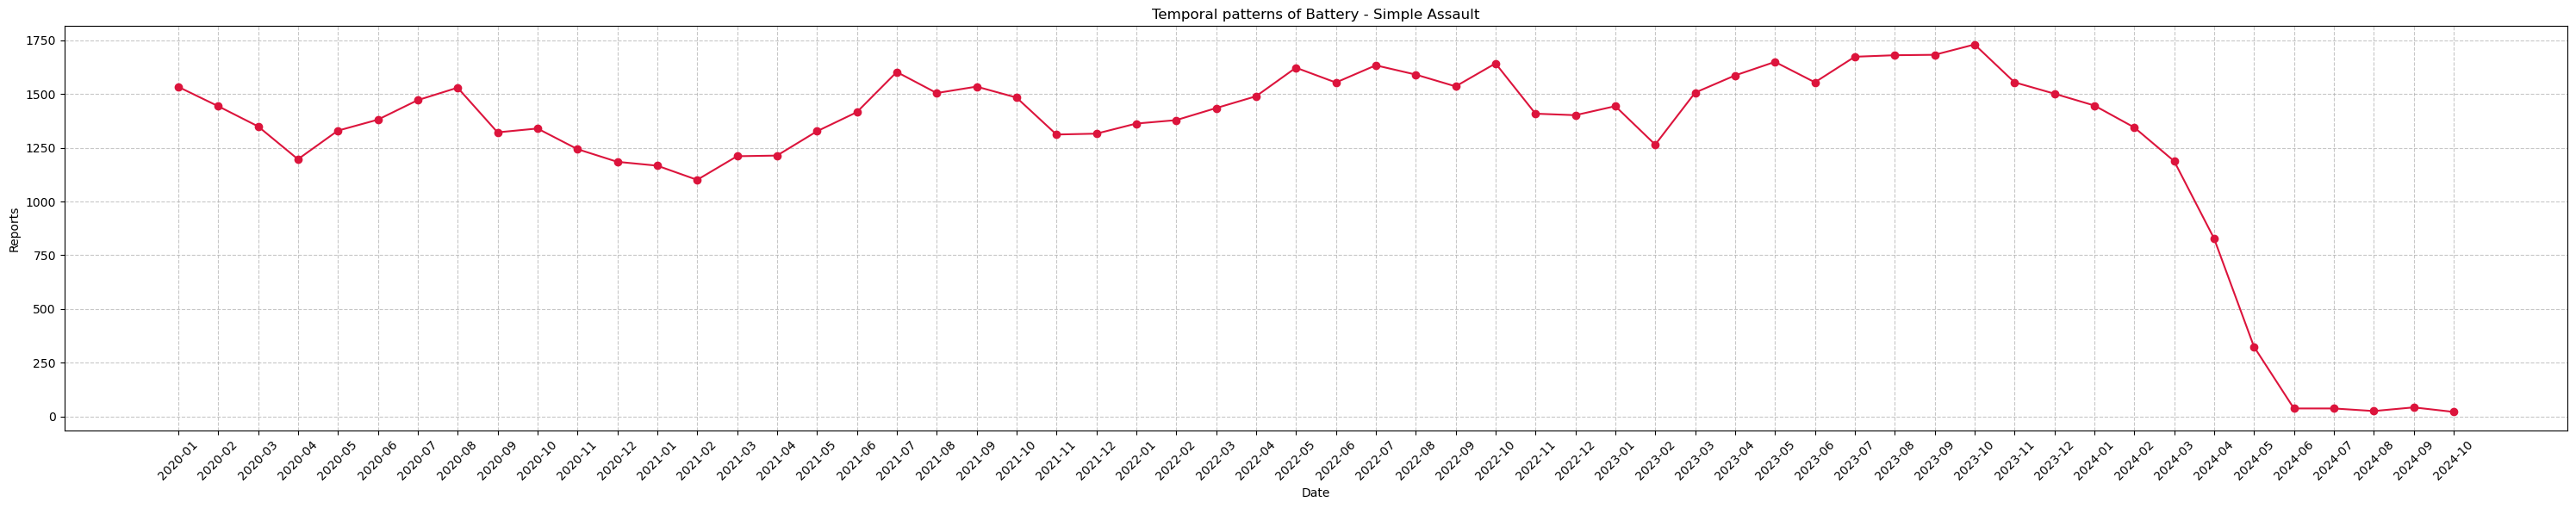

In [44]:
battery_simple_assault = 'battery - simple assault'
df_filtrado = df[df['crime_desc'].str.contains(battery_simple_assault, case=False, na=False)]

# Agrupar por mes/año de ocurrencia y contar incidentes
patron_temporal_battery_simple_assault = df_filtrado.groupby('year_month_ocurrance')['id_report'].count().sort_index()

# Gráfico
plt.figure(figsize=(30, 6))
plt.plot(patron_temporal_battery_simple_assault.index, patron_temporal_battery_simple_assault.values, marker='o', color='crimson')

plt.title('Temporal patterns of Battery - Simple Assault')
plt.xlabel('Date')
plt.ylabel('Reports')
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar todas las fechas en el eje X
plt.xticks(ticks=range(len(patron_temporal_battery_simple_assault.index)), labels=patron_temporal_battery_simple_assault.index, rotation=45)

plt.tight_layout()
plt.show()

# Filtrar por delito burglary from vehicle 

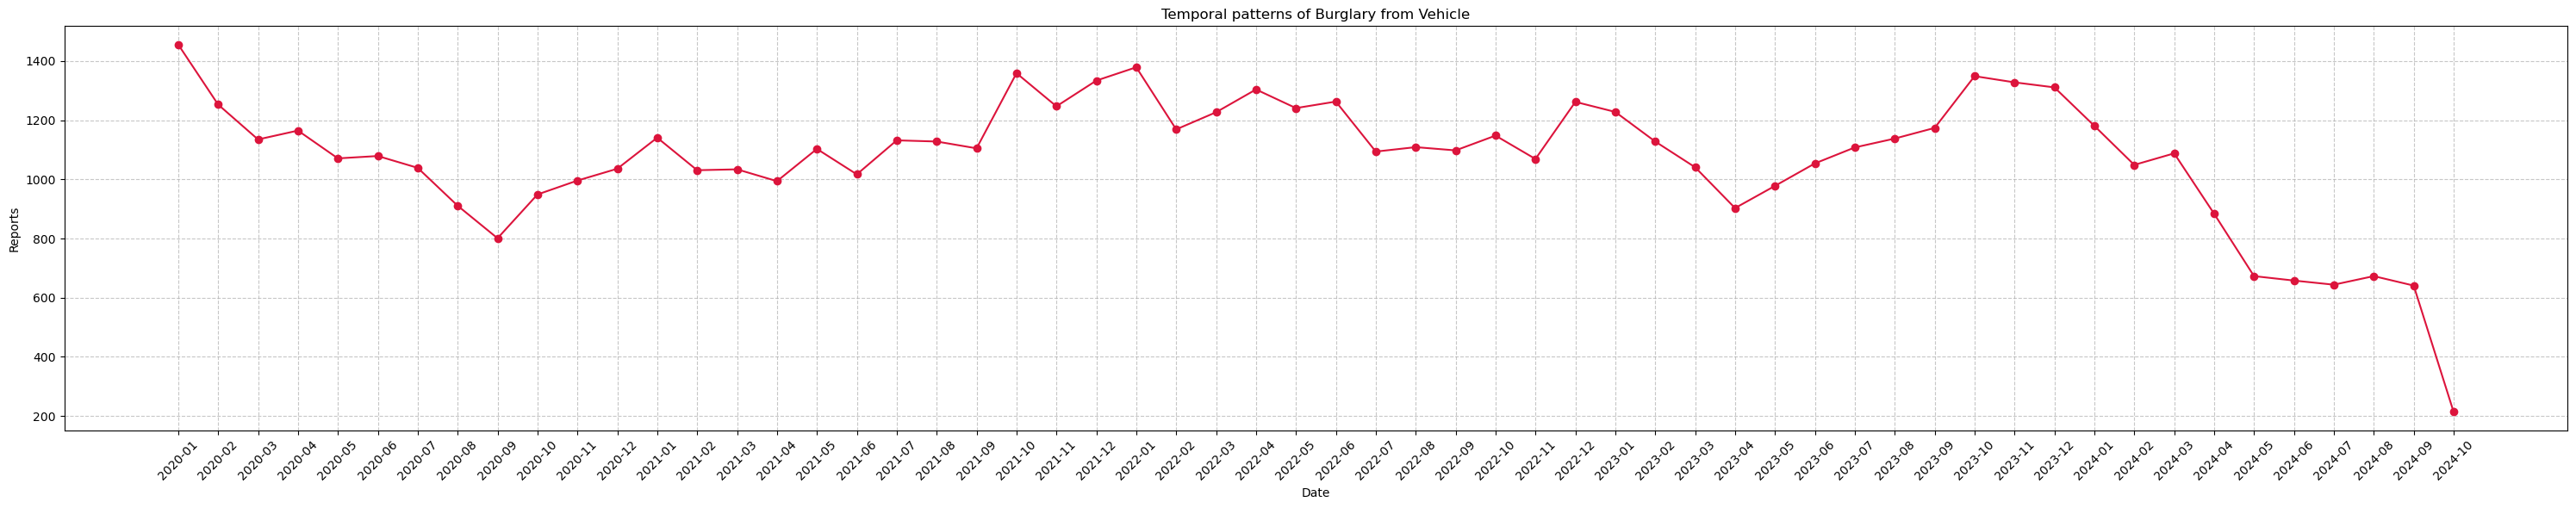

In [51]:
burglary_from_vehicle = 'burglary from vehicle'
df_filtrado = df[df['crime_desc'].str.contains(burglary_from_vehicle, case=False, na=False)]

# Agrupar por mes/año de ocurrencia y contar incidentes
patron_temporal_burglary_from_vehicle = df_filtrado.groupby('year_month_ocurrance')['id_report'].count().sort_index()

# Gráfico
plt.figure(figsize=(30, 6))
plt.plot(patron_temporal_burglary_from_vehicle.index, patron_temporal_burglary_from_vehicle.values, marker='o', color='crimson')

plt.title('Temporal patterns of Burglary from Vehicle')
plt.xlabel('Date')
plt.ylabel('Reports')
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar todas las fechas en el eje X
plt.xticks(ticks=range(len(patron_temporal_burglary_from_vehicle.index)), labels=patron_temporal_burglary_from_vehicle.index, rotation=45)

plt.tight_layout()
plt.show()

# Filtrar por delito theft of identity

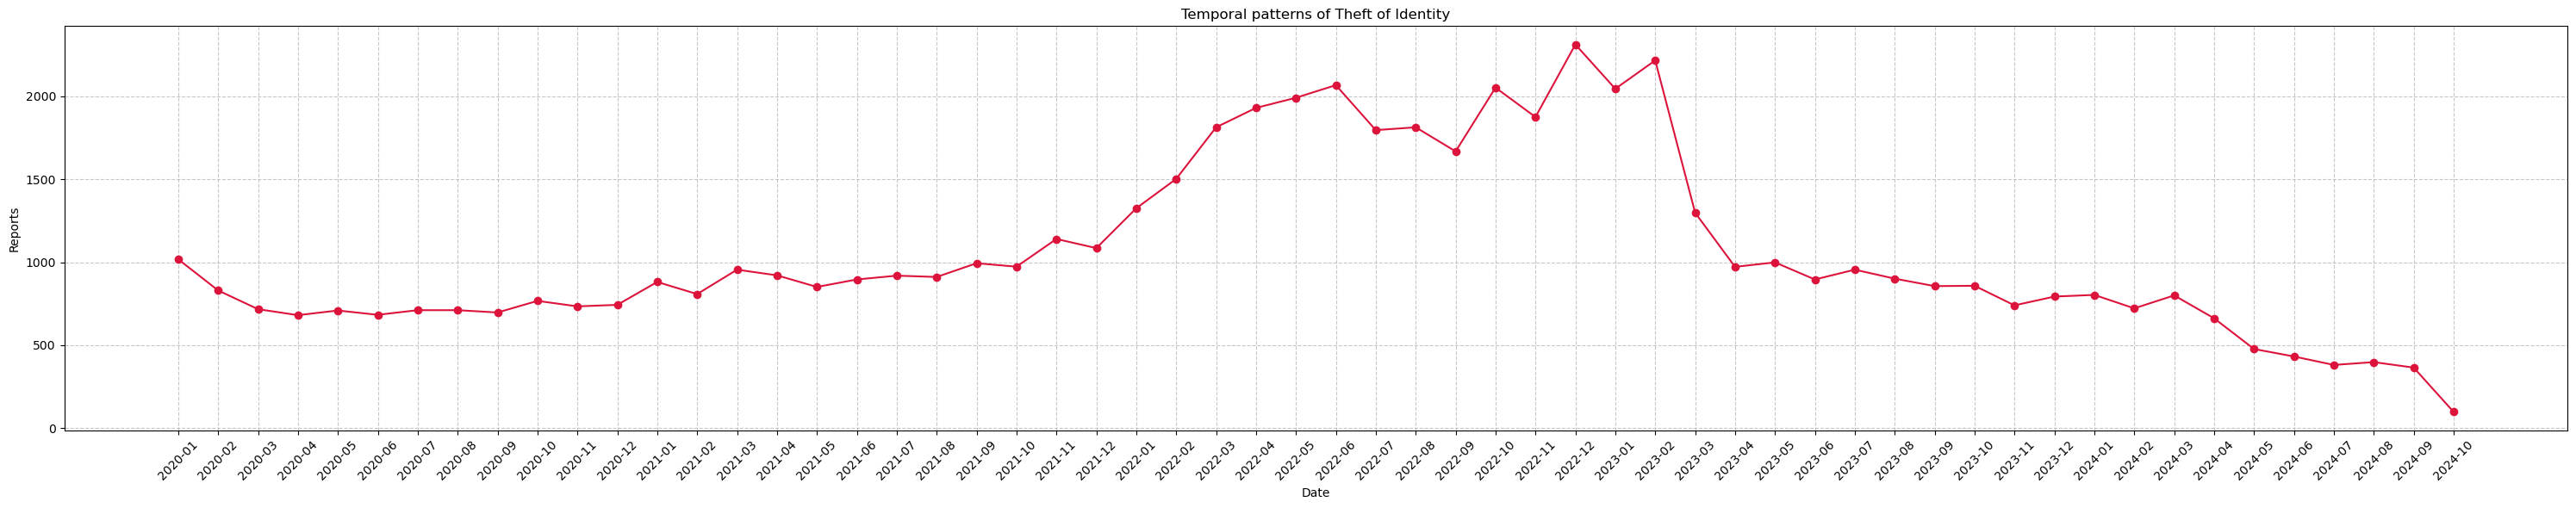

In [58]:
theft_of_identity = 'theft of identity'
df_filtrado = df[df['crime_desc'].str.contains(theft_of_identity, case=False, na=False)]

# Agrupar por mes/año de ocurrencia y contar incidentes
patron_temporal = df_filtrado.groupby('year_month_ocurrance')['id_report'].count().sort_index()

# Gráfico
plt.figure(figsize=(30, 6))
plt.plot(patron_temporal.index, patron_temporal.values, marker='o', color='crimson')

plt.title('Temporal patterns of Theft of Identity')
plt.xlabel('Date')
plt.ylabel('Reports')
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar todas las fechas en el eje X
plt.xticks(ticks=range(len(patron_temporal.index)), labels=patron_temporal.index, rotation=45)

plt.tight_layout()
plt.show()

# Filtrar por delito vandalism - felony ($400 & over, all church vandalisms)

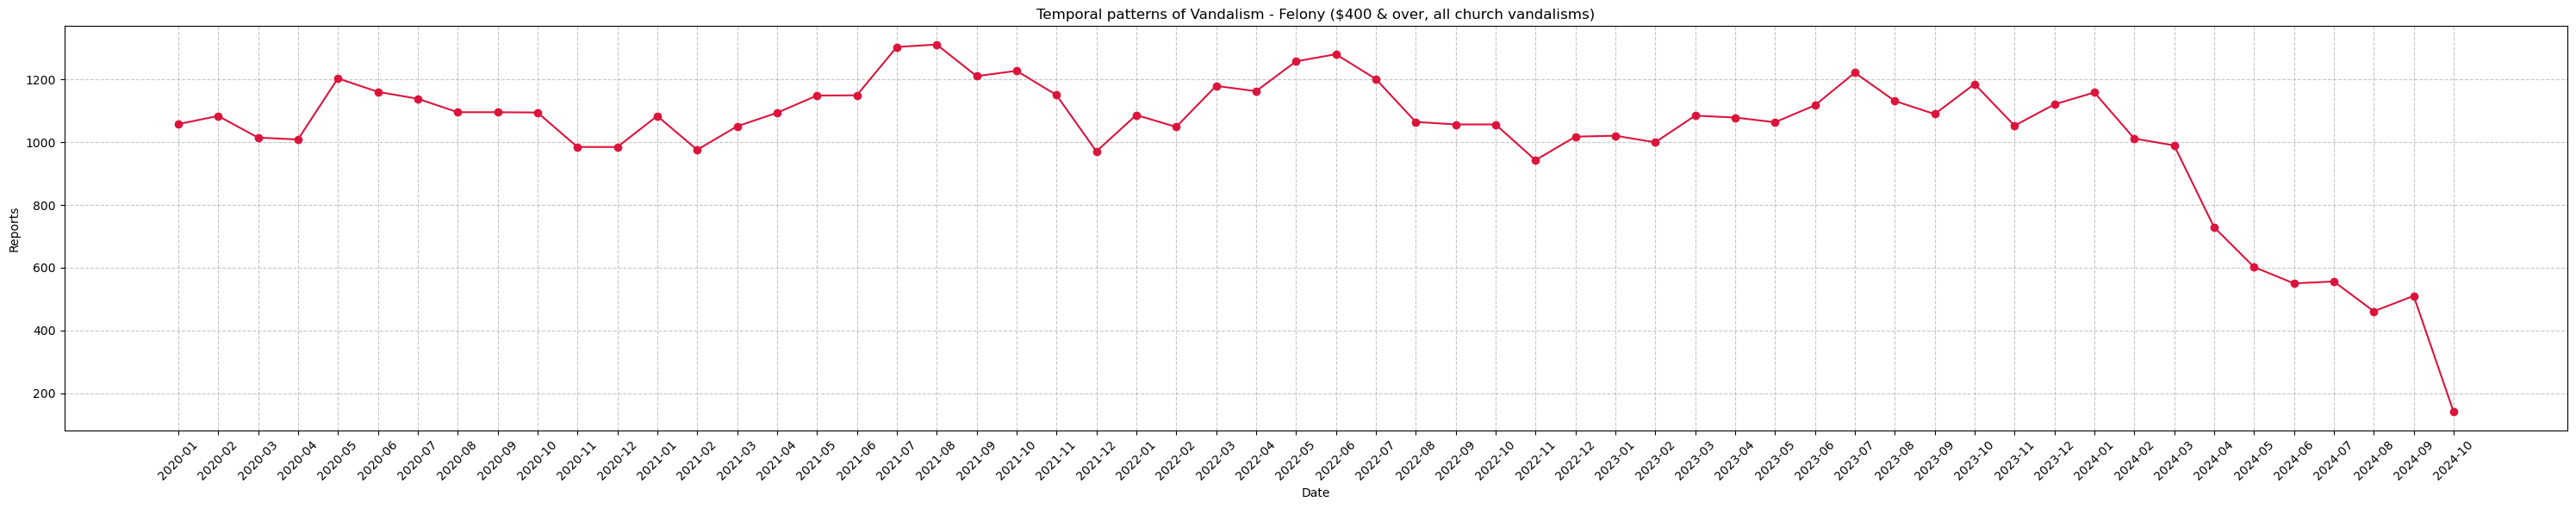

In [65]:
vandalism_felony = 'vandalism - felony ($400 & over, all church vandalisms)'
df_filtrado = df[df['crime_desc'].str.contains(vandalism_felony, case=False, na=False, regex=False)]

# Agrupar por mes/año de ocurrencia y contar incidentes
patron_temporal_vandalism_felony = df_filtrado.groupby('year_month_ocurrance')['id_report'].count().sort_index()

# Gráfico
plt.figure(figsize=(30, 6))
plt.plot(patron_temporal_vandalism_felony.index, patron_temporal_vandalism_felony.values, marker='o', color='crimson')

plt.title('Temporal patterns of Vandalism - Felony ($400 & over, all church vandalisms)')
plt.xlabel('Date')
plt.ylabel('Reports')
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar todas las fechas en el eje X
plt.xticks(ticks=range(len(patron_temporal_vandalism_felony.index)), labels=patron_temporal_vandalism_felony.index, rotation=45)

plt.tight_layout()
plt.show()

# Filtrar por delito burglary 

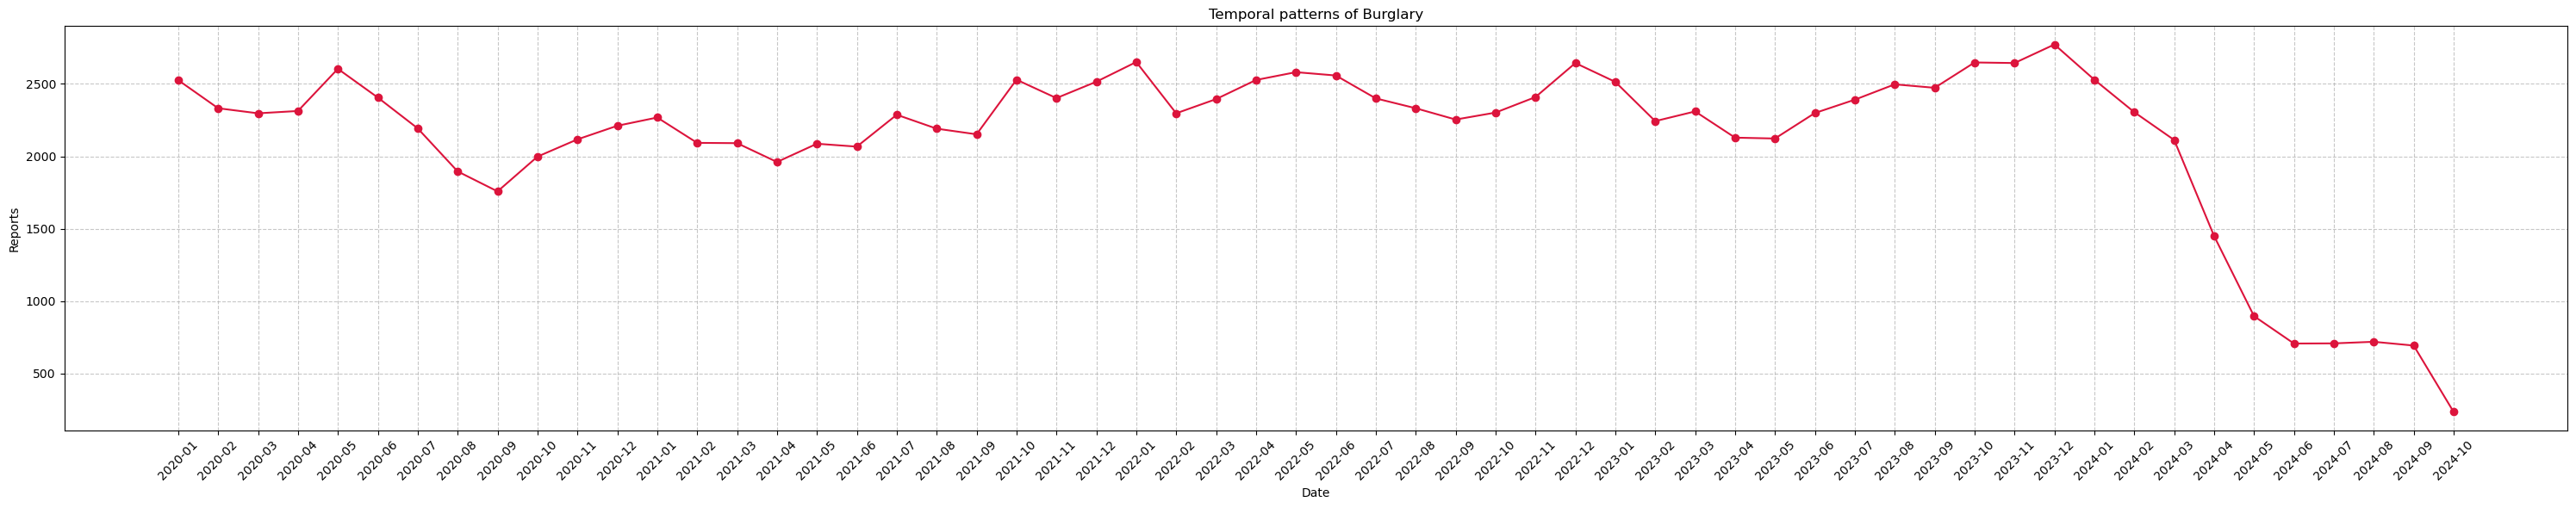

In [72]:
burglary = 'burglary'
df_filtrado = df[df['crime_desc'].str.contains(burglary, case=False, na=False)]

# Agrupar por mes/año de ocurrencia y contar incidentes
patron_temporal_burglary = df_filtrado.groupby('year_month_ocurrance')['id_report'].count().sort_index()

# Gráfico
plt.figure(figsize=(30, 6))
plt.plot(patron_temporal_burglary.index, patron_temporal_burglary.values, marker='o', color='crimson')

plt.title('Temporal patterns of Burglary')
plt.xlabel('Date')
plt.ylabel('Reports')
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar todas las fechas en el eje X
plt.xticks(ticks=range(len(patron_temporal_burglary.index)), labels=patron_temporal_burglary.index, rotation=45)

plt.tight_layout()
plt.show()

# Filtrar por delito assault with deadly weapon, aggravated assault

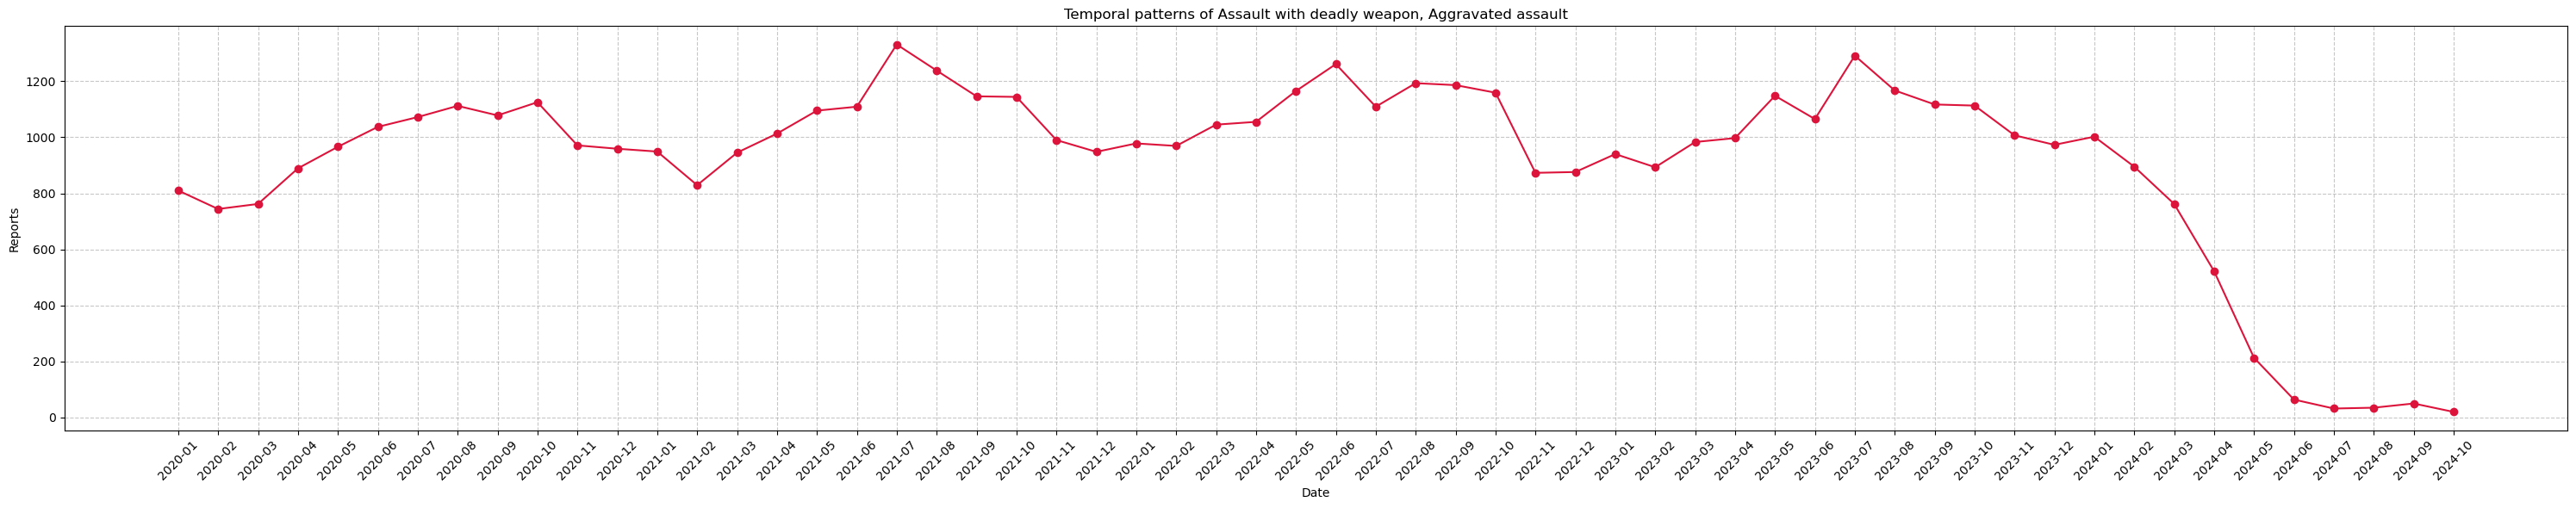

In [79]:
assault_with_deadly_weapon = 'assault with deadly weapon, aggravated assault'
df_filtrado = df[df['crime_desc'].str.contains(assault_with_deadly_weapon, case=False, na=False)]

# Agrupar por mes/año de ocurrencia y contar incidentes
patron_temporal_assault_with_deadly_weapon = df_filtrado.groupby('year_month_ocurrance')['id_report'].count().sort_index()

# Gráfico
plt.figure(figsize=(30, 6))
plt.plot(patron_temporal_assault_with_deadly_weapon.index, patron_temporal_assault_with_deadly_weapon.values, marker='o', color='crimson')

plt.title('Temporal patterns of Assault with deadly weapon, Aggravated assault')
plt.xlabel('Date')
plt.ylabel('Reports')
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar todas las fechas en el eje X
plt.xticks(ticks=range(len(patron_temporal.index)), labels=patron_temporal.index, rotation=45)

plt.tight_layout()
plt.show()

# Filtrar por delito theft plain - petty ($950 & under)

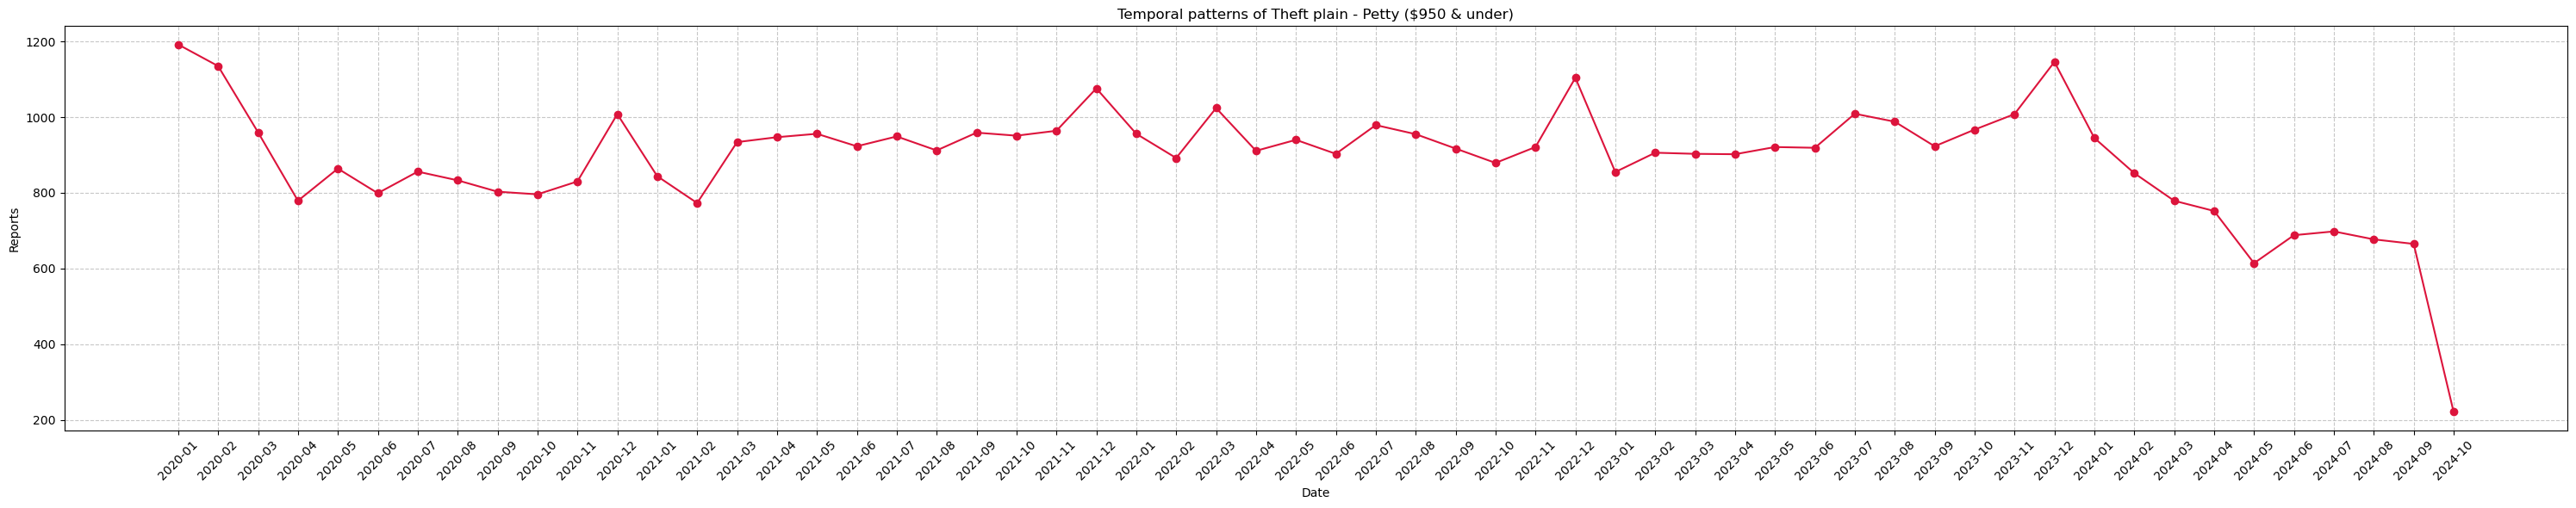

In [86]:
theft_plain_petty = 'theft plain - petty ($950 & under)'
df_filtrado = df[df['crime_desc'].str.contains(theft_plain_petty, case=False, na=False, regex=False)]

# Agrupar por mes/año de ocurrencia y contar incidentes
patron_temporal_theft_plain_petty = df_filtrado.groupby('year_month_ocurrance')['id_report'].count().sort_index()

# Gráfico
plt.figure(figsize=(30, 6))
plt.plot(patron_temporal_theft_plain_petty.index, patron_temporal_theft_plain_petty.values, marker='o', color='crimson')

plt.title('Temporal patterns of Theft plain - Petty ($950 & under)')
plt.xlabel('Date')
plt.ylabel('Reports')
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar todas las fechas en el eje X
plt.xticks(ticks=range(len(patron_temporal_theft_plain_petty.index)), labels=patron_temporal_theft_plain_petty.index, rotation=45)

plt.tight_layout()
plt.show()

# Filtrar por delito intimate partner - simple assault

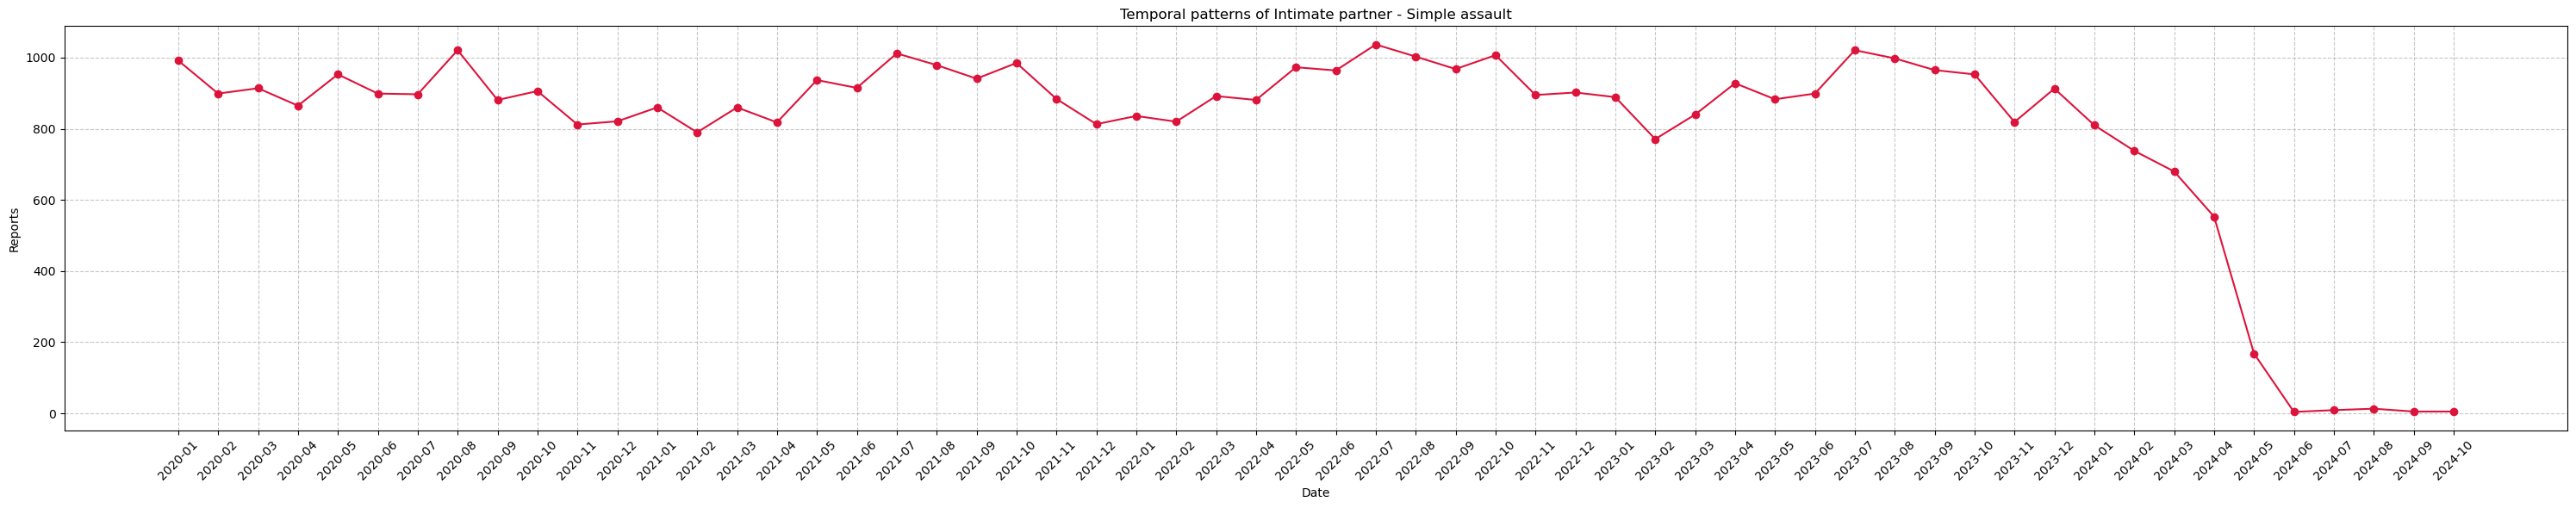

In [93]:
intimate_partner = 'intimate partner - simple assault'
df_filtrado = df[df['crime_desc'].str.contains(intimate_partner, case=False, na=False)]

# Agrupar por mes/año de ocurrencia y contar incidentes
patron_temporal_intimate_partner = df_filtrado.groupby('year_month_ocurrance')['id_report'].count().sort_index()

# Gráfico
plt.figure(figsize=(30, 6))
plt.plot(patron_temporal_intimate_partner.index, patron_temporal_intimate_partner.values, marker='o', color='crimson')

plt.title('Temporal patterns of Intimate partner - Simple assault')
plt.xlabel('Date')
plt.ylabel('Reports')
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar todas las fechas en el eje X
plt.xticks(ticks=range(len(patron_temporal_intimate_partner.index)), labels=patron_temporal_intimate_partner.index, rotation=45)

plt.tight_layout()
plt.show()

# Filtrar por delito theft from motor vehicle - petty ($950 & under)

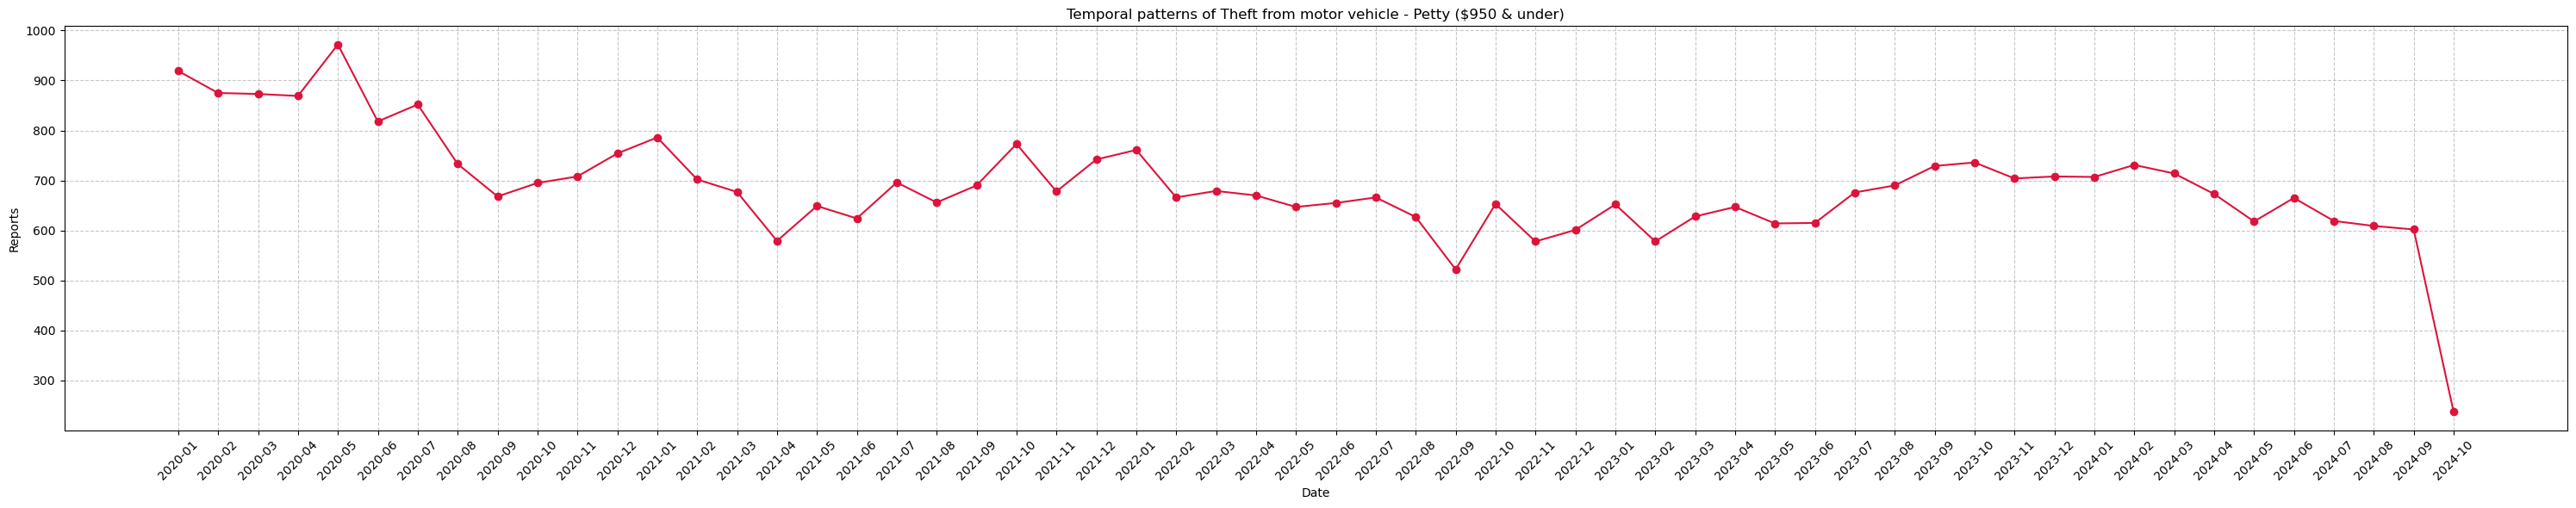

In [100]:
theft_from_motor_vehicle = 'theft from motor vehicle - petty ($950 & under)'
df_filtrado = df[df['crime_desc'].str.contains(theft_from_motor_vehicle, case=False, na=False, regex=False)]

# Agrupar por mes/año de ocurrencia y contar incidentes
patron_temporal_theft_from_motor_vehicle = df_filtrado.groupby('year_month_ocurrance')['id_report'].count().sort_index()

# Gráfico
plt.figure(figsize=(30, 6))
plt.plot(patron_temporal_theft_from_motor_vehicle.index, patron_temporal_theft_from_motor_vehicle.values, marker='o', color='crimson')

plt.title('Temporal patterns of Theft from motor vehicle - Petty ($950 & under)')
plt.xlabel('Date')
plt.ylabel('Reports')
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar todas las fechas en el eje X
plt.xticks(ticks=range(len(patron_temporal_theft_from_motor_vehicle.index)), labels=patron_temporal_theft_from_motor_vehicle.index, rotation=45)

plt.tight_layout()
plt.show()

# Calcular la diferencia de tiempo entre la fecha del delito y la fecha de la denuncia

In [107]:
# Asegurarse de que las columnas sean datetime
df['date_ocurrance'] = pd.to_datetime(df['date_ocurrance'], errors='coerce')
df['date_report'] = pd.to_datetime(df['date_report'], errors='coerce')

# Calcular diferencia en días
df['dias_diferencia'] = (df['date_report'] - df['date_ocurrance']).dt.days

# Histograma de la diferencia de tiempo (Escala logarítmica)

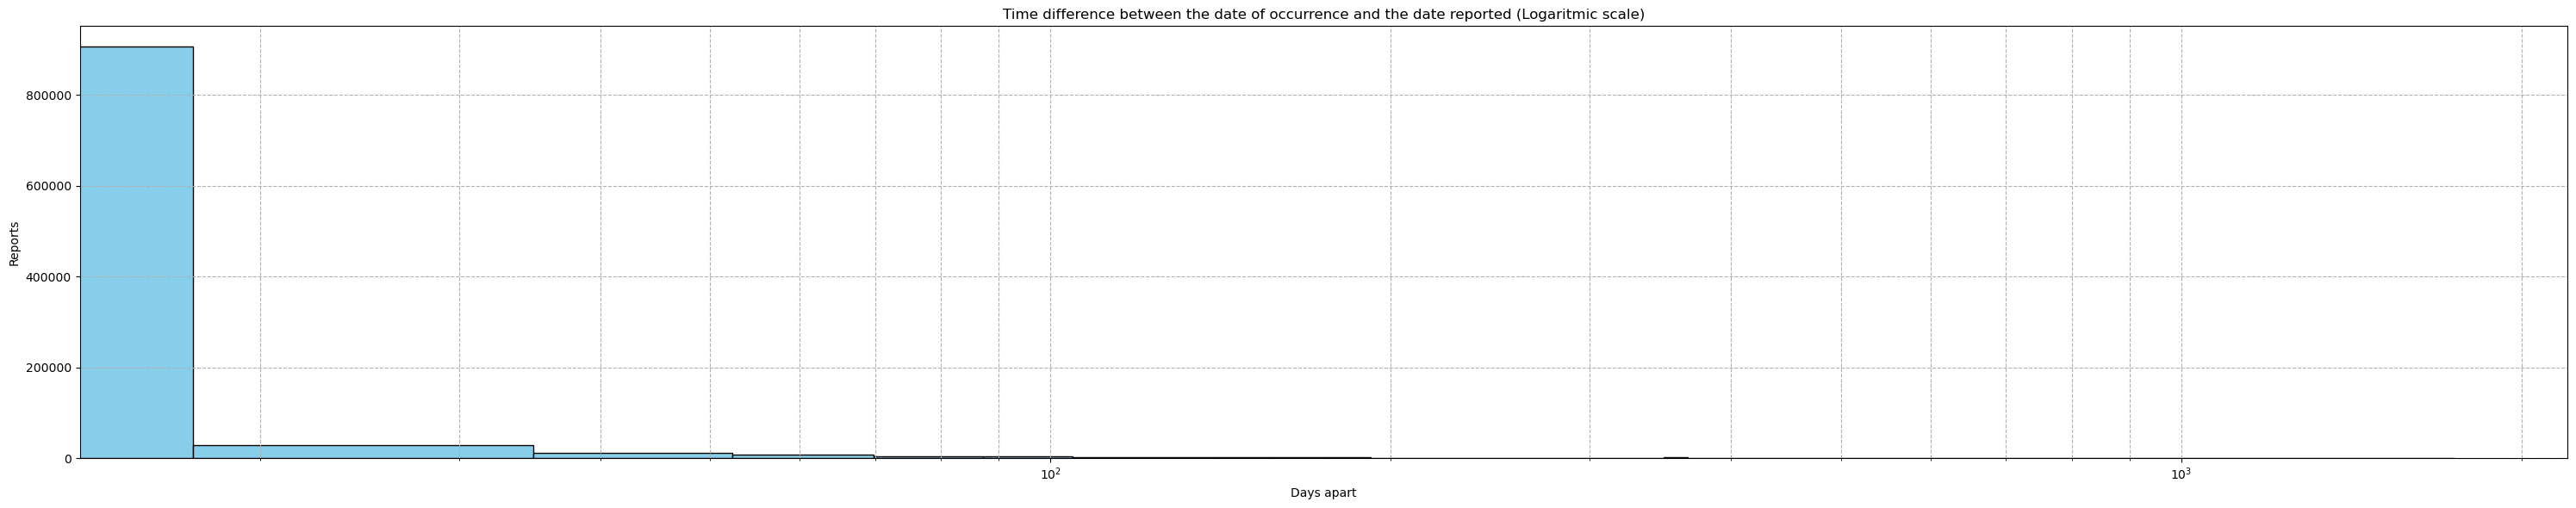

In [114]:
plt.figure(figsize=(30, 6))
plt.hist(df['dias_diferencia'].dropna(), bins=100, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title('Time difference between the date of occurrence and the date reported (Logaritmic scale)')
plt.xlabel('Days apart')
plt.ylabel('Reports')
plt.grid(True, which='both', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

# Histograma de la diferencia de tiempo (Hasta 10 días máximo)

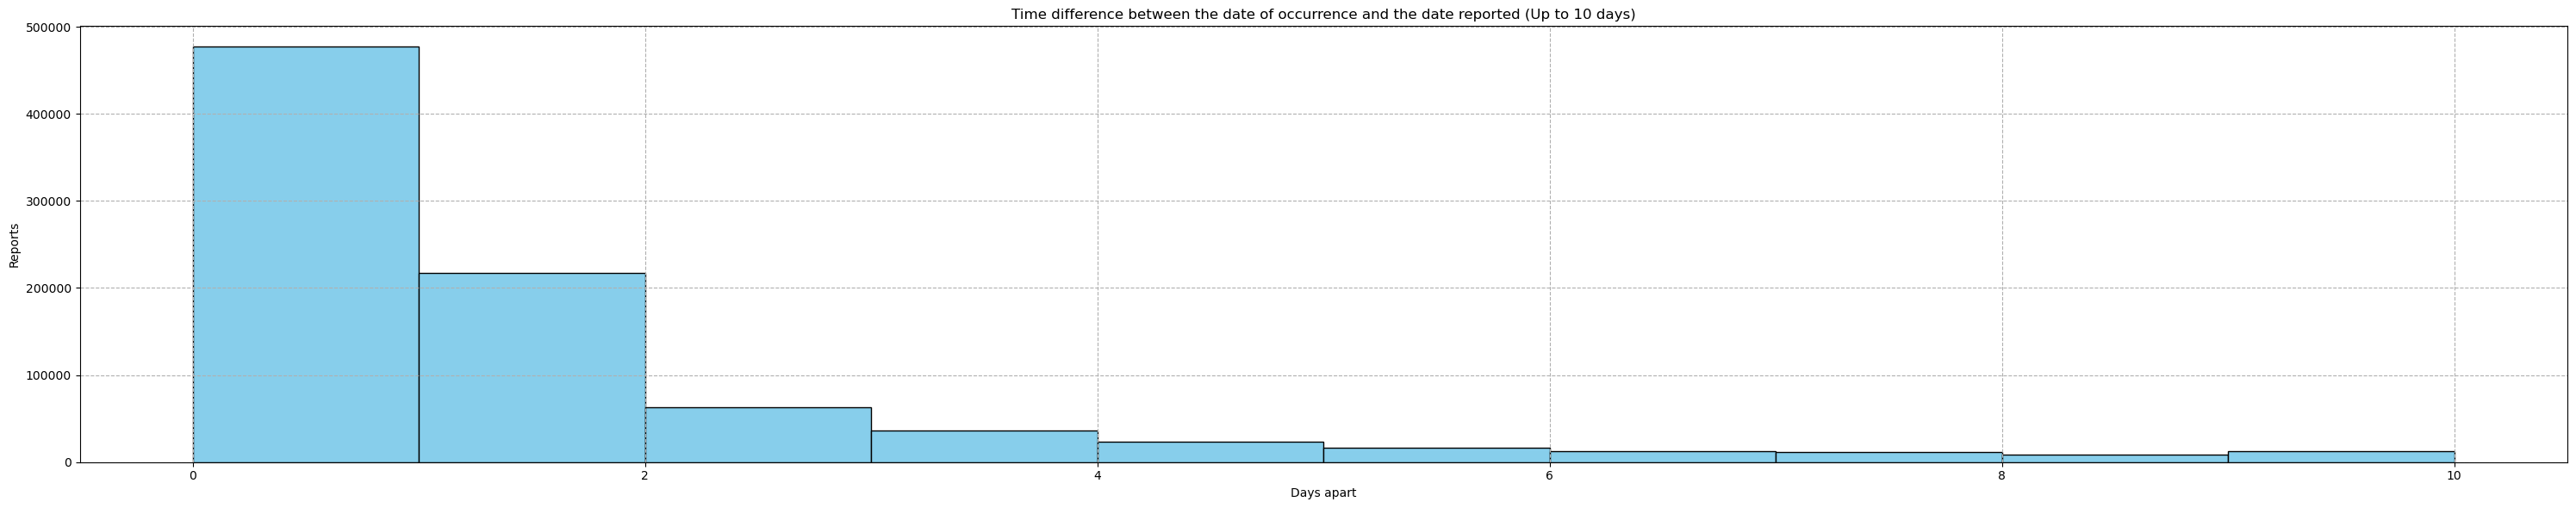

In [121]:
plt.figure(figsize=(30, 6))
df['dias_diferencia'].dropna().loc[lambda x: x <= 10].plot(
    kind='hist', bins=10, color='skyblue', edgecolor='black'
)

plt.title('Time difference between the date of occurrence and the date reported (Up to 10 days)')
plt.xlabel('Days apart')
plt.ylabel('Reports')
plt.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

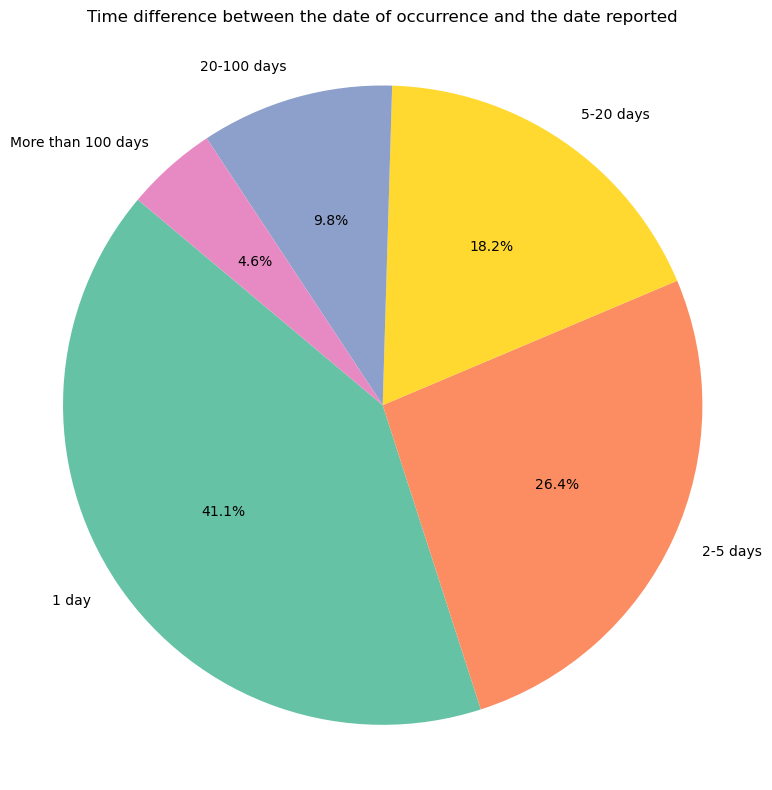

In [128]:
# Crear las categorías
conteo_dias = {
    '1 day': (df['dias_diferencia'] == 1).sum(),
    '2-5 days': ((df['dias_diferencia'] >= 2) & (df['dias_diferencia'] <= 5)).sum(),
    '5-20 days': ((df['dias_diferencia'] >= 5) & (df['dias_diferencia'] <= 20)).sum(),
    '20-100 days': ((df['dias_diferencia'] >= 20) & (df['dias_diferencia'] <= 100)).sum(),
    'More than 100 days': (df['dias_diferencia'] > 100).sum()
}

# Gráfica de tarta
plt.figure(figsize=(8, 8))
plt.pie(conteo_dias.values(),
        labels=conteo_dias.keys(),
        autopct='%1.1f%%',
        startangle=140,
        colors=['#66c2a5', '#fc8d62', '#ffd92f', '#8da0cb', '#e78ac3', '#a6d854', '#e5c494', '#b3b3b3'])
plt.title('Time difference between the date of occurrence and the date reported')
plt.axis('equal')  # Mantiene proporción circular
plt.tight_layout()
plt.show()

# Filtrar los 15 delitos con más retraso promedio

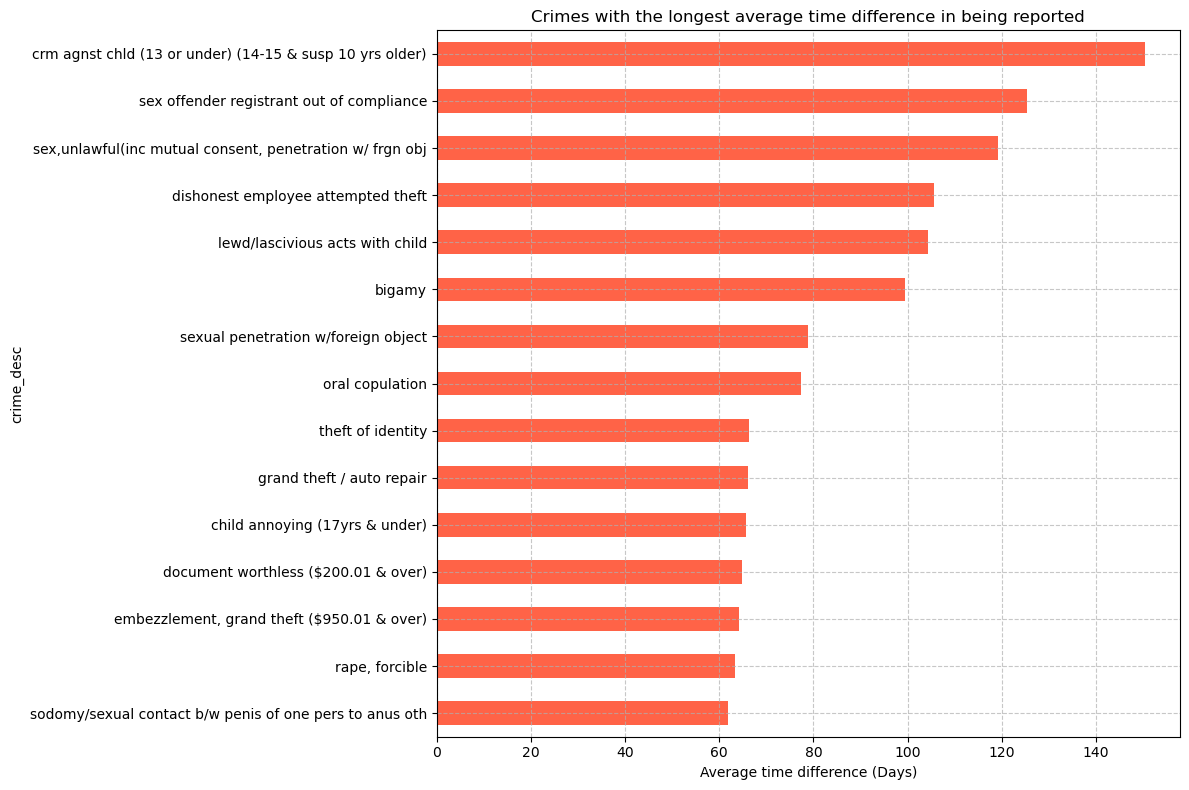

In [135]:
# Agrupar y calcular retraso promedio por tipo de delito
retraso_por_delito = df.groupby('crime_desc')['dias_diferencia'].mean().dropna().sort_values(ascending=False)

# Filtrar los 15 delitos con más retraso promedio
top_retrasos = retraso_por_delito.head(15)

# Graficar
plt.figure(figsize=(12, 8))
top_retrasos.plot(kind='barh', color='tomato')
plt.xlabel('Average time difference (Days)')
plt.title('Crimes with the longest average time difference in being reported')
plt.gca().invert_yaxis()  # Para que el delito con más retraso aparezca arriba
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar las 5 categorías de delitos con más retraso en denuciar

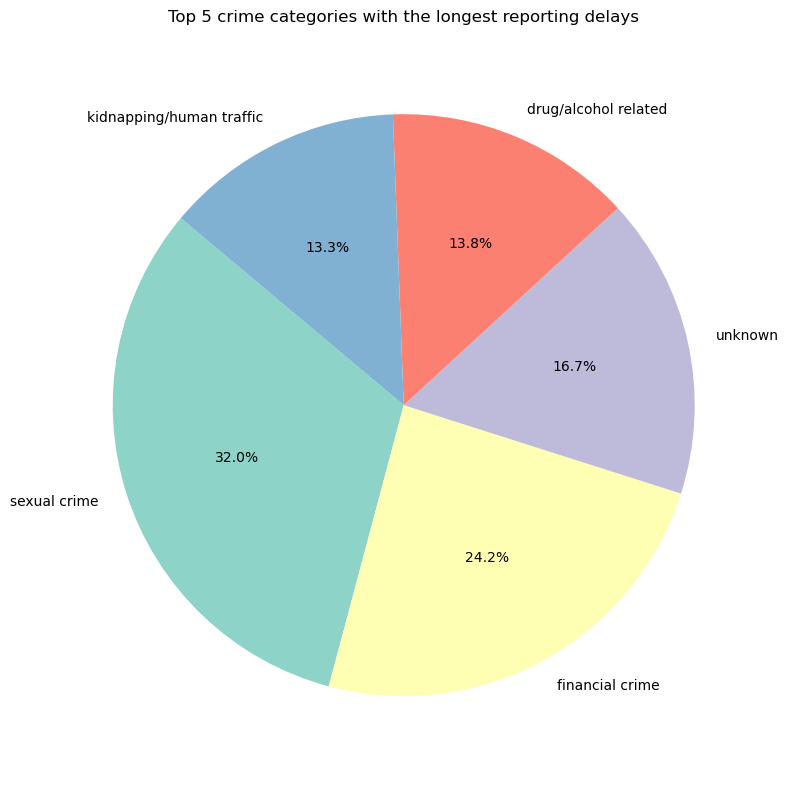